In [1]:
from statsImport import *
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression, load_boston, load_breast_cancer
import tensorflow as tf

learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

# Get Data

In [2]:
mnist = learn.datasets.load_dataset('mnist')

data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)

test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

print(type(data))
print(data)

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
<class 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [3]:
# Minimise samples if you want to train the algorithm i  less computational time.
# max_samples = 2000
# data = data[:max_samples]
# labels = labels[:max_samples]

# Do Things!

- Linear classifier means that the evidence is simply added up to create the final guess. The y with the most evidence is called that prediction.

In [4]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
print(feature_columns)
model = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10, model_dir='/tmp/tf_model')

[_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)]


In [5]:
learner = tqdm(range(10))
for _ in learner:
    model.fit(data, labels, batch_size=1000, steps=1000)
    learner.set_description('Accuracy: {}'.format(model.evaluate(test_data, test_labels)['accuracy']))

Accuracy: 0.9280999898910522: 100%|██████████| 10/10 [01:23<00:00,  8.27s/it]


## Check Accuracy

In [6]:
print(model.evaluate(test_data, test_labels)['accuracy'])

0.9281


# Visual Learnt Weights

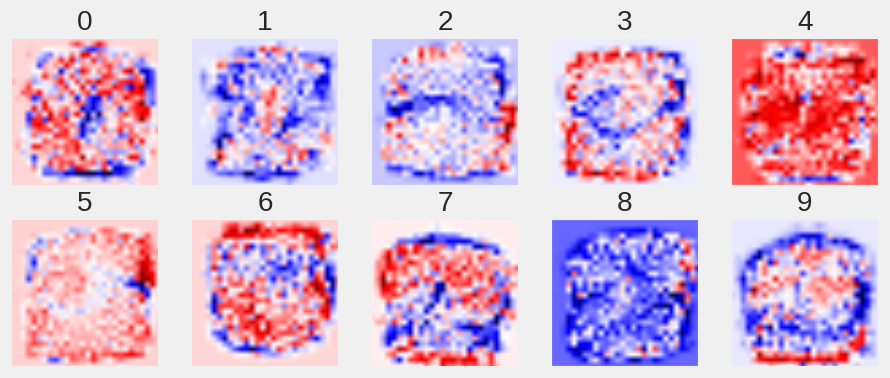

In [7]:
weights = model.weights_
f, axes = graph.subplots(2, 5, figsize=(10,4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=graph.cm.seismic)
    a.set_title(i)
    a.set_xticks(()) # ticks be gone
    a.set_yticks(())
graph.show()